## Ivestigating Fandango Recent Movie Ratings
--------------------------------------------------------------------

In this project, we will analyze more popular movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

**Hickey's analysis** - In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator).

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [55]:
# Dataset with 2015 year movie ratings from 4 popular rating sites 
movie_ratings_previous = pd.read_csv('fandango_score_comparison.csv')

# Dataset with 2016 and 2017 years movie ratings from 4 popular rating sites 
movie_ratings_recent = pd.read_csv('movie_ratings_16_17.csv')

movie_ratings_previous.info()
movie_ratings_recent.info()

movie_ratings_previous.head()
movie_ratings_recent.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [56]:
#Isolate the columns that offer information about Fandango's ratings in separate variables

fd_previous = movie_ratings_previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fd_recent = movie_ratings_recent[['movie', 'year', 'fandango']]

Isolate movies released in 2015 from fd_previous and 2016 from fd_recent as we will focus our analysis on this sample of the population

In [57]:
#Extract year from FILM column

fd_previous['Year'] = pd.to_numeric(fd_previous['FILM'].str[-5:-1])
fd_previous.head(2)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [58]:
fd_previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [59]:
fd_2015 = fd_previous[fd_previous['Year'] == 2015]
fd_2016 = fd_recent[fd_recent['year'] == 2016]

fd_2015.head(2)
fd_2016.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


#### Plot distribution comparison of fandango movie ratings for 2015 & 2016

([<matplotlib.axis.XTick at 0x7f20400f37f0>,
 <a list of 11 Text xticklabel objects>)

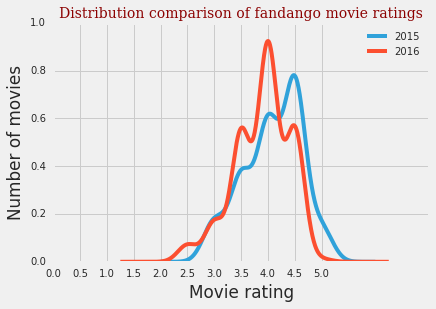

In [60]:
plt.style.use('fivethirtyeight')

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

fd_2015['Fandango_Stars'].plot.kde()
fd_2016['fandango'].plot.kde()

plt.title('Distribution comparison of fandango movie ratings', fontdict=font)
plt.ylabel('Number of movies')
plt.xlabel('Movie rating')
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.legend(("2015","2016"))

### Analysis

- Distribution shape - both distributions are left skewed with similar shape.
- But when looked closer there is clear shift in ratings towards lower end in 2016 compared to 2015.
    - Number of 5 star and 4.5 start ratings are less in 2016
    - Number of 3.5 start and 4 start incresed instead.
    - We can see ratings below 3 as well in 2016.
- This suggests that there is a change in fandango's ratings for popular movies post Hickey's anlaysis.
----------------------------------------

In [61]:
(fd_2015['Fandango_Stars'].value_counts(normalize=True)*100).sort_index()
(fd_2016['fandango'].value_counts(normalize=True)*100).sort_index()

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

#### Analysis

- It doesn't make sense to compare absolute frequencies for both year as they are different movies.
- So we go with relative frequency and take the percentages of ratings for better readability.
- Just as it shows in the distribution graph above, we can see a difference in the two dirstributions and a can also see a shift to lower end in the 2016 movie ratings.
----------------------------

In [62]:
summary = pd.DataFrame()
summary['2015'] = [round(fd_2015['Fandango_Stars'].mean(), 2), fd_2015['Fandango_Stars'].median(), fd_2015['Fandango_Stars'].mode()[0]]
summary['2016'] = [round(fd_2016['fandango'].mean(), 2), fd_2016['fandango'].median(), fd_2016['fandango'].mode()[0]]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.09,3.89
median,4.00,4.00
mode,4.50,4.00


(0, 5.5)

([<matplotlib.axis.YTick at 0x7f204017d898>,
 <a list of 11 Text yticklabel objects>)

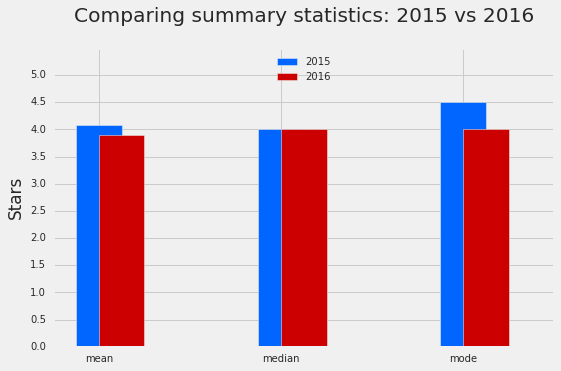

In [68]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25, rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

## Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.